<a href="https://colab.research.google.com/github/jaothan26/digital_assets_analysis_/blob/main/241113_w_o_cex_chatGPT_end_to_end_on_whales_analysis_only_1_Year_2022(1)(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install web3 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.6 MB/s eta 0:00:00


In [ ]:
import random
from web3 import Web3
from datetime import datetime


# Initialize Alchemy or Infura endpoint
alchemy_url = "https://eth-mainnet.g.alchemy.com/v2/OPutfOp_VyXojpS6t3xDlHiUnWCX8D1e"
w3 = Web3(Web3.HTTPProvider(alchemy_url))

In [ ]:
import random
from datetime import datetime

# Initialize a global set to store unique addresses
addresses = set()

def get_addresses_from_random_blocks(w3, year=2023, num_blocks=8):
    """
    Fetches addresses from a random selection of Ethereum blocks for a given year,
    adding new addresses to a global set to enhance results with each call.

    Args:
        w3 (Web3): An instance of the Web3 class connected to an Ethereum node.
        year (int): The year to filter the blocks by (default is 2023).
        num_blocks (int): The number of random blocks to fetch (default is 8).

    Returns:
        set: A set of unique addresses found in the transactions of the selected blocks.
    """
    global addresses  # Use the global set to maintain addresses across calls

    # Get the range of blocks
    block_range_start = w3.eth.get_block("earliest").number
    block_range_end = w3.eth.get_block("latest").number

    # Select random block numbers
    random_block_numbers = random.sample(range(block_range_start, block_range_end), num_blocks)

    addresses_in_year = set()  # Local set to track addresses for the current year

    for block_num in random_block_numbers:
        block = w3.eth.get_block(block_num, full_transactions=True)
        block_time = datetime.utcfromtimestamp(block['timestamp'])  # Convert timestamp to datetime

        # Check if the block time is in the specified year
        if block_time.year == year:
            block_transactions = block['transactions']  # Get transactions from the block

            # Collect addresses from transactions
            for tx in block_transactions:
                try:
                    _from = tx['from']
                    _to = tx['to']
                    if _from and _from.lower():  # Ensure _from is not None or empty
                        addresses_in_year.add(_from)
                    if _to and _to.lower():  # Ensure _to is not None or empty
                        addresses_in_year.add(_to)
                except KeyError:
                    print("Ignore the invalid transaction")

    # Update global unique_addresses set with new addresses found in this call
    addresses.update(addresses_in_year)

    return addresses_in_year  # Return the set of unique addresses for the current year


In [ ]:
 #Iterate through years from 2016 to 2024  (à partir de2016 car avant bp blockchain apparement)
while len(addresses) < 250:
  for year in range(2022, 2023):  # 2025 is exclusive, so it will go up to 2024
    num_blocks = 10  # You can adjust the number of blocks to fetch for each year  #avec 5 recuperer des données e 2017 et 2018 (il avait mis 10)
    print(f"Collecting addresses for year {year}...")
    addresses = get_addresses_from_random_blocks(w3, year=year, num_blocks=num_blocks)
    print(f"Addresses collected for {year}: {addresses}")
print(f"Current address count: {len(addresses)}. Fetching more addresses...")

# Final list of unique addresses across all calls
print("All unique addresses collected:", addresses)

Addresses collected for 2022: {'0xC76320AC0e0c1C14Ea75ec29aA1b455a9c374700', '0x267F73c996B501aF83d7989EA7f4dF859D9656b2', '0x947245F9057514be448236cde5C20Db263BB4F7F', '0x04E187bb9b41a4963DDa96ed2093f299bBA5358D', '0x74312363e45DCaBA76c59ec49a7Aa8A65a67EeD3', '0xB89a57526Fffe12b173CCb5061126746fFBBEE51', '0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b', '0xAA6EFd9f04ba496f3Fa87CC5cb7C78CBC099717F', '0x5d15A448B45180dc994C5D32233AAfe2CBe4845D', '0xbdE4A6291B66Ebcb60C226C597618a2D9b526A4E', '0x7A18ce76cf00d9a572742Ac8070f92fbd9057661', '0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8', '0xeed85Ddd6828B8C714141d34A12D0c07F7553182', '0x2ffCC661011beC72e1A9524E12060983E74D14ce', '0xB51c454B25244A16818e69C16b864D8CA176Ef1a', '0x9378368ba6b85c1FbA5b131b530f5F5bEdf21A18', '0xBA447cDE8421703c7b846D7cc3BebE274F9B6F38', '0xDd4A2c39e0182ff11421eaa255a6c0d7302605B8', '0x8ECD3FCE6a1bd1372a0e731D15ecEA500D35cb3A', '0x2E2d0B1A813bB9988B9FA3bE11860be16B420f59', '0x18BB9010fc3802C82F2a20A0771766FA3f517E06', '0x

In [ ]:
 len(addresses)

619

In [ ]:

# recreate the state of all the addresses for whales (def : 5% of total balance)
state = dict()
for address in addresses:
  balance = w3.from_wei(w3.eth.get_balance(address),'tether')
  state[address] = balance

sorted_state = sorted(state, key=state.get, reverse=True)
selected_addresses = sorted_state[:int(len(sorted_state)*0.05)]
print(selected_addresses)
print("we take 5% of the total wallets by balance and limit to a total of", len(selected_addresses), "whales addresses")


['0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', '0x28C6c06298d514Db089934071355E5743bf21d60', '0xA7EFAe728D2936e78BDA97dc267687568dD593f3', '0xf89d7b9c864f589bbF53a82105107622B35EaA40', '0x56Eddb7aa87536c09CCc2793473599fD21A8b17F', '0x4976A4A02f38326660D17bf34b431dC6e2eb2327', '0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549', '0x267be1C1D684F78cb4F6a176C4911b741E4Ffdc0', '0xDFd5293D8e347dFe59E90eFd55b2956a1343963d', '0x9696f59E4d72E237BE84fFD425DCaD154Bf96976', '0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511', '0xF5C9F957705bea56a7e806943f98F7777B995826', '0xb8901acB165ed027E32754E0FFe830802919727f', '0x416299AAde6443e6F6e8ab67126e65a7F606eeF5', '0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5', '0x463E5b673d1029989c9B059d36393c539beF9094', '0xD1669Ac6044269b59Fa12c5822439F609Ca54F41', '0x963737C550E70FFe4D59464542a28604eDb2eF9a', '0xAe2D4617c862309A3d75A0fFB358c7a5009c673F', '0x9430801EBAf509Ad49202aaBC5F5Bc6fd8A3dAf8', '0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b', '0x935f64B44B5C48A1539C4AdA5161D2

In [ ]:
import time
import requests
import pandas as pd
from web3 import Web3

# Initialize Web3 with Alchemy or Infura endpoint
alchemy_url = "https://eth-mainnet.g.alchemy.com/v2/OPutfOp_VyXojpS6t3xDlHiUnWCX8D1e"
w3 = Web3(Web3.HTTPProvider(alchemy_url))

# Set up API keys
etherscan_api_key = "VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"
moralis_api_key = "W3udXIDi34aiEBCF34OdaSMDUazN5yuhdmMUSHF3WoMiBGyNkJSIYWJO5lm1yFQB"

In [ ]:
# Function to get current ETH balance using Web3
#def get_eth_balance(wallet_address):
   # try:
     #   balance = w3.eth.get_balance(wallet_address)
      #  return float(balance) / 1e18  # Convert from Wei to Ether
    #except Exception as e:
     #   print(f"Error retrieving ETH balance for {wallet_address}: {e}")
      #  return 0.0

In [ ]:
#from web3 import Web3

def handle_address(address):
    """
    Example function that expects an address as a string or bytes.

    Args:
        address (str or bytes): The Ethereum address to handle.

    Returns:
        str: The address as a string in checksum format.
    """
    # Debug output to inspect the input
    print(f'Type of address: {type(address)}, Value: {address}')

    if isinstance(address, bytes):
        # Convert bytes to hex string
        address = w3.to_hex(address)  # Convert bytes to a hex string
    elif not isinstance(address, str):
        raise ValueError("Address must be a string.")

    # Convert to checksum address
    checksum_address = w3.to_checksum_address(address)

    # Further processing with the checksum address
    print(f'Handling address: {checksum_address}')
    return checksum_address

def is_valid_hex(hex_str):
    """ Check if a string is a valid hexadecimal number. """
    # Check if the string contains only hex characters and has even length
    return all(c in '0123456789abcdefABCDEF' for c in hex_str) and len(hex_str) % 2 == 0

def convert_addresses(original_addresses):
    """ Convert a list of original addresses from hex string to checksum format. """
    converted_addresses = []

    for hex_address in original_addresses:
        try:
            # Validate the hexadecimal address
            if not is_valid_hex(hex_address[2:]):  # Skip '0x' prefix for validation
                raise ValueError(f"Invalid hexadecimal address: {hex_address}")

            # Convert the hex address string to bytes
            byte_address = bytes.fromhex(hex_address[2:])  # Skip '0x' prefix for bytes conversion
            # Call the handle_address function and store the result
            converted_addresses.append(handle_address(byte_address))
        except ValueError as e:
            print(f'ValueError: {e}')  # Catch and print ValueErrors
        except Exception as ex:
            print(f'An error occurred: {ex}')  # Catch and print any other exceptions

    return converted_addresses

# List of original hexadecimal address strings
original_hex_addresses = selected_addresses



# Convert all original addresses
converted_addresses = convert_addresses(original_hex_addresses)

# Print the converted addresses
print("\nConverted Checksum Addresses:")
for addr in converted_addresses:
    print(addr)


Type of address: <class 'bytes'>, Value: b"\xc0*\xaa9\xb2#\xfe\x8d\n\x0e\\O'\xea\xd9\x08<ul\xc2"
Handling address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2
Type of address: <class 'bytes'>, Value: b'(\xc6\xc0b\x98\xd5\x14\xdb\x08\x994\x07\x13U\xe5t;\xf2\x1d`'
Handling address: 0x28C6c06298d514Db089934071355E5743bf21d60
Type of address: <class 'bytes'>, Value: b'\xa7\xef\xaer\x8d)6\xe7\x8b\xda\x97\xdc&v\x87V\x8d\xd5\x93\xf3'
Handling address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3
Type of address: <class 'bytes'>, Value: b'\xf8\x9d{\x9c\x86OX\x9b\xbfS\xa8!\x05\x10v"\xb3^\xaa@'
Handling address: 0xf89d7b9c864f589bbF53a82105107622B35EaA40
Type of address: <class 'bytes'>, Value: b"V\xed\xdbz\xa8u6\xc0\x9c\xcc'\x93G5\x99\xfd!\xa8\xb1\x7f"
Handling address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F
Type of address: <class 'bytes'>, Value: b"Iv\xa4\xa0/82f`\xd1{\xf3KC\x1d\xc6\xe2\xeb#'"
Handling address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327
Type of address: <class 'bytes'>, Valu

In [ ]:


def get_balance(address):
    """Retrieve the ETH balance for a given address."""
    try:
        # Ensure the address is in checksum format
        checksum_address = w3.to_checksum_address(address)
        balance = w3.eth.get_balance(checksum_address)  # Get balance in Wei
        return w3.from_wei(balance, 'ether')  # Convert Wei to Ether
    except Exception as e:
        print(f"Error retrieving balance for {address}: {e}")
        return None

# List of original hexadecimal address strings
original_hex_addresses = converted_addresses

# Retrieve balances for all addresses
balances = {}
for hex_address in original_hex_addresses:
    balance = get_balance(hex_address)
    if balance is not None:
        balances[hex_address] = balance

# Print the balances
print("\nETH Balances:")
for addr, bal in balances.items():
    print(f"Address: {addr} - Balance: {bal} ETH")



ETH Balances:
Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 - Balance: 2945309.196117298854540688 ETH
Address: 0x28C6c06298d514Db089934071355E5743bf21d60 - Balance: 160826.760919853633848013 ETH
Address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3 - Balance: 69301.243716976326641296 ETH
Address: 0xf89d7b9c864f589bbF53a82105107622B35EaA40 - Balance: 38648.327335677166680725 ETH
Address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F - Balance: 38481.21061592858088252 ETH
Address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327 - Balance: 35001.725700731294773165 ETH
Address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549 - Balance: 34612.755136898180481095 ETH
Address: 0x267be1C1D684F78cb4F6a176C4911b741E4Ffdc0 - Balance: 31886.949332641259280988 ETH
Address: 0xDFd5293D8e347dFe59E90eFd55b2956a1343963d - Balance: 30559.478451111982774354 ETH
Address: 0x9696f59E4d72E237BE84fFD425DCaD154Bf96976 - Balance: 29911.853491997055266766 ETH
Address: 0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511 - Balance: 

In [ ]:
from web3 import Web3

# Connect to Ethereum node (Infura/Alchemy)
#infura_url = "YOUR_INFURA_OR_ALCHEMY_URL"
#web3 = Web3(Web3.HTTPProvider(infura_url))

# List of wallet addresses to check
#wallet_addresses = addresses #["WALLET_ADDRESS_1", "WALLET_ADDRESS_2", "WALLET_ADDRESS_3"]
wallet_addresses = original_hex_addresses
# List of stablecoin contract addresses (USDT, USDC, DAI as examples)
stablecoins = {
    "USDT": "0xdAC17F958D2ee523a2206206994597C13D831ec7",
    "USDC": "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606EB48",
    "DAI": "0x6B175474E89094C44Da98b954EedeAC495271d0F"
}

# Convert all stablecoin addresses to checksum format
stablecoins = {name: w3.to_checksum_address(addr) for name, addr in stablecoins.items()}

# ERC-20 ABI for balanceOf and decimals functions
erc20_abi = [
    {
        "constant": True,
        "inputs": [{"name": "_owner", "type": "address"}],
        "name": "balanceOf",
        "outputs": [{"name": "balance", "type": "uint256"}],
        "type": "function",
    },
    {
        "constant": True,
        "inputs": [],
        "name": "decimals",
        "outputs": [{"name": "", "type": "uint8"}],
        "type": "function",
    }
]

# Function to get stablecoin balances for multiple wallets
def get_stablecoin_balances(wallets):
    all_balances = {}
    for wallet in wallets:
        wallet_balances = {}
        for name, contract_address in stablecoins.items():
            try:
                # Load contract
                contract = w3.eth.contract(address=contract_address, abi=erc20_abi)

                # Get balance and decimals
                balance = contract.functions.balanceOf(w3.to_checksum_address(wallet)).call()
                decimals = contract.functions.decimals().call()

                # Adjust balance based on token decimals
                adjusted_balance = balance / (10 ** decimals)
                wallet_balances[name] = adjusted_balance

            except Exception as e:
                print(f"Error fetching balance for {name} at {wallet}: {e}")
                wallet_balances[name] = None
        # Store balances for the wallet
        all_balances[wallet] = wallet_balances
    return all_balances

# Retrieve stablecoin balances for multiple addresses
balances_stablecoin = get_stablecoin_balances(wallet_addresses)
print("Stablecoin Balances for each wallet:", balances)


Stablecoin Balances for each wallet: {'0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2': Decimal('2945309.196117298854540688'), '0x28C6c06298d514Db089934071355E5743bf21d60': Decimal('160826.760919853633848013'), '0xA7EFAe728D2936e78BDA97dc267687568dD593f3': Decimal('69301.243716976326641296'), '0xf89d7b9c864f589bbF53a82105107622B35EaA40': Decimal('38648.327335677166680725'), '0x56Eddb7aa87536c09CCc2793473599fD21A8b17F': Decimal('38481.21061592858088252'), '0x4976A4A02f38326660D17bf34b431dC6e2eb2327': Decimal('35001.725700731294773165'), '0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549': Decimal('34612.755136898180481095'), '0x267be1C1D684F78cb4F6a176C4911b741E4Ffdc0': Decimal('31886.949332641259280988'), '0xDFd5293D8e347dFe59E90eFd55b2956a1343963d': Decimal('30559.478451111982774354'), '0x9696f59E4d72E237BE84fFD425DCaD154Bf96976': Decimal('29911.853491997055266766'), '0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511': Decimal('16305.54356401727262793'), '0xF5C9F957705bea56a7e806943f98F7777B995826': De

In [ ]:
# Initialize a dictionary to hold the sums for each address
sum_balances = {}

# Iterate through each address and its corresponding stablecoin balances
for address, stablecoin_balances in balances_stablecoin.items():
    # Initialize total balance for the current address
    total_balance = 0

    # Sum values for USDC, DAI, and USDT
    for coin in ['USDT', 'USDC', 'DAI']:
        total_balance += stablecoin_balances.get(coin, 0)  # Use .get to avoid KeyError

    # Store the total balance in the results dictionary
    sum_balances[address] = total_balance

# Print the results
for address, total in sum_balances.items():
    print(f"Address: {address} - Total Stablecoin Balance: {total:.2f}")

Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 - Total Stablecoin Balance: 35564.67
Address: 0x28C6c06298d514Db089934071355E5743bf21d60 - Total Stablecoin Balance: 1762499734.57
Address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3 - Total Stablecoin Balance: 2042.18
Address: 0xf89d7b9c864f589bbF53a82105107622B35EaA40 - Total Stablecoin Balance: 213090824.08
Address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F - Total Stablecoin Balance: 947431797.66
Address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327 - Total Stablecoin Balance: 0.00
Address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549 - Total Stablecoin Balance: 1093792228.64
Address: 0x267be1C1D684F78cb4F6a176C4911b741E4Ffdc0 - Total Stablecoin Balance: 13066.75
Address: 0xDFd5293D8e347dFe59E90eFd55b2956a1343963d - Total Stablecoin Balance: 705720813.22
Address: 0x9696f59E4d72E237BE84fFD425DCaD154Bf96976 - Total Stablecoin Balance: 1066840159.05
Address: 0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511 - Total Stablecoin Balance: 4012.33


In [ ]:
for addr, bal in balances_stablecoin.items():
    print(f"Address: {addr} - Balance stablecoins: {bal}")
for addr, bal in balances.items():
    print(f"Address: {addr} - Balance: {bal} ETH")
#for address, total_value in address_value_sum.items():
  #  print(f"Address: {address}, Total Value: {total_value} ETH")
for address, total in sum_balances.items():
    print(f"Address: {address} - Total Stablecoin Balance: {total:.2f}")

Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 - Balance stablecoins: {'USDT': 21195.262787, 'USDC': 6124.268984, 'DAI': 8245.13460173}
Address: 0x28C6c06298d514Db089934071355E5743bf21d60 - Balance stablecoins: {'USDT': 1019557226.172199, 'USDC': 740857577.503451, 'DAI': 2084930.8950858964}
Address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3 - Balance stablecoins: {'USDT': 2042.18, 'USDC': 0.0, 'DAI': 0.0}
Address: 0xf89d7b9c864f589bbF53a82105107622B35EaA40 - Balance stablecoins: {'USDT': 155153781.546794, 'USDC': 56730086.5686, 'DAI': 1206955.9666395446}
Address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F - Balance stablecoins: {'USDT': 947431797.66267, 'USDC': 0.0, 'DAI': 0.0}
Address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327 - Balance stablecoins: {'USDT': 0.0, 'USDC': 0.0, 'DAI': 0.0}
Address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549 - Balance stablecoins: {'USDT': 954348477.313715, 'USDC': 139443750.827035, 'DAI': 0.500309278291287}
Address: 0x267be1C1D684F78cb4F6a176C491

In [ ]:
#balances.keys
#address_value_sum.keys

In [ ]:
import pandas as pd

all_addresses = set(sum_balances.keys()).union(balances.keys())
#.union(address_value_sum.keys())

data = {
    'address': [],
    'balance': [],
    'balance_total_stablecoins': [],
    #'total_value_cex': []
}

for address in all_addresses:
    data['address'].append(address)
    data['balance'].append(balances.get(address, 0))  # Default to 0 if no ETH balance
    data['balance_total_stablecoins'].append(sum_balances.get(address, 0))  # Default to 0 if no stablecoin balance
    #data['total_value_cex'].append(address_value_sum.get(address, 0))  # Default to 0 if no total value

# Step 2: Create the DataFrame
df = pd.DataFrame(data)

# Display the resulting DataFrame
print("DataFrame with Balance, Balance Stablecoins, and Total Value per Unique Address:\n", df)
df

DataFrame with Balance, Balance Stablecoins, and Total Value per Unique Address:
                                        address                     balance  \
0   0x56Eddb7aa87536c09CCc2793473599fD21A8b17F     38481.21061592858088252   
1   0x935f64B44B5C48A1539C4AdA5161D27ace4205b5      103.943331317359137121   
2   0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2  2945309.196117298854540688   
3   0x3cD751E6b0078Be393132286c442345e5DC49699       43.400057311930182853   
4   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549    34612.755136898180481095   
5   0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca       68.332411660958665879   
6   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976    29911.853491997055266766   
7   0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5      4220.18745744432215842   
8   0xAe2D4617c862309A3d75A0fFB358c7a5009c673F      312.328269187142129376   
9   0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b      123.505430863557930998   
10  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    30559.4784

,address,balance,balance_total_stablecoins
0,0x56Eddb7aa87536c09CCc2793473599fD21A8b17F,38481.21061592858088252,9.474318e+08
1,0x935f64B44B5C48A1539C4AdA5161D27ace4205b5,103.943331317359137121,6.258591e+05
2,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,2945309.196117298854540688,3.556467e+04
3,0x3cD751E6b0078Be393132286c442345e5DC49699,43.400057311930182853,1.103408e+04
4,0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549,34612.755136898180481095,1.093792e+09
5,0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca,68.332411660958665879,1.082100e-02
6,0x9696f59E4d72E237BE84fFD425DCaD154Bf96976,29911.853491997055266766,1.066840e+09
7,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,4220.18745744432215842,4.226063e+03
8,0xAe2D4617c862309A3d75A0fFB358c7a5009c673F,312.328269187142129376,1.798472e+08
9,0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b,123.505430863557930998,2.439651e+06


ATTENTION ICI ENDBLOCK ET START  BLOCK UNIQUEMENT POUR 2022 (SINON DOIT REPRENDRE LA FUNCTION QUI GENERE UNE DATE DEPUIS UN BLOC°

In [ ]:
import requests
from datetime import datetime
etherscan_api_key = "VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"
def get_transactions_for_address(address):
    """
    Retrieve transactions for a given Ethereum address using the Etherscan API.

    Parameters:
    - address (str): The Ethereum address to look up.

    Returns:
    - list: A list of transactions with 'timestamp' and other details.
    """
    try:
        # Define the Etherscan API endpoint
        etherscan_api_url = "https://api.etherscan.io/api"

        # API parameters for the transaction list
        params = {
            'module': 'account',
            'action': 'txlist',
            'address': address,
            'startblock': 13919298,             #Latest Block Number at Jan 01-2022 11:31:41 AM (UTC)
            'endblock': 16304463,               #Latest Block Number at Dec 31-2022 11:31:30 AM (UTC)
            'sort': 'asc',  # Sort ascending to get the first transaction easily
            'apikey': "VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"  # Replace with your Etherscan API key
        }

        # Make the request to Etherscan API
        response = requests.get(etherscan_api_url, params=params)
        response_data = response.json()  # Parse the JSON response here

        # Check if the response contains transactions
        if response_data.get('status') != '1' or 'result' not in response_data:
            print("No transactions found or an error occurred.")
            return []

        # Parse transactions and keep only the relevant fields
        transactions = [
            {
                'hash': tx['hash'],
                'timestamp': int(tx['timeStamp']),
                'value': int(tx['value']),
                'from': tx['from'],
                'to': tx['to']
            }
            for tx in response_data['result']
        ]

        return transactions

    except Exception as e:
        print(f"Error retrieving transactions for address {address}: {e}")
        return []

# Example usage
#address = '0x5f65f7b609678448494De4C87521CdF6cEf1e932'
transactions = get_transactions_for_address(selected_addresses)
print(transactions)  # List of transactions with timestamps and other details


[{'hash': '0x5a282a657f2b6919ba530848fead098d49cf0151a1e392948f0b32e7be54959f', 'timestamp': 1641036699, 'value': 6934240000000000, 'from': '0xeb2629a2734e272bcc07bda959863f316f4bd4cf', 'to': '0xfdb203b8e543bafa1c8db709d6be30f58c904790'}, {'hash': '0x3271192330a7bffb5c9bd8358a81a703011298716e8e5acf4b62ff950472ccb9', 'timestamp': 1641036727, 'value': 1098919290000000000, 'from': '0xeb2629a2734e272bcc07bda959863f316f4bd4cf', 'to': '0xd6baceb1173645d5d07cb9e8fb32be26d7fecebc'}, {'hash': '0x42f0158908246cc1c97fcd6fd85eb918b4af3de20a541381f43ea2fcbf2dac94', 'timestamp': 1641036736, 'value': 134019020000000000, 'from': '0xeb2629a2734e272bcc07bda959863f316f4bd4cf', 'to': '0x50daaa7966d00523807a281dbd10be36adb45acb'}, {'hash': '0x496f375336b0b47abd65c7ec34540c52f14e5c8976c40cf8f47646ca3c288082', 'timestamp': 1641036736, 'value': 11614260000000000, 'from': '0xeb2629a2734e272bcc07bda959863f316f4bd4cf', 'to': '0x43109ca8e9a553d23c2d9c2c14245b7afb74d8e5'}, {'hash': '0x4f640faf23e8e7e349647e2b620cc

In [ ]:
from datetime import datetime

def get_date(addresses, date_type="first"):
    """
    Retrieve the transaction date for a list of wallet addresses.

    Parameters:
    - addresses (list): A list of wallet addresses to look up.
    - date_type (str): 'first' for the earliest transaction date, 'last' for the most recent.

    Returns:
    - dict: A dictionary where each key is an address and the value is the transaction date in 'YYYY-MM-DD' format.
    """
    # Initialize a dictionary to store results
    address_dates = {}

    for address in addresses:
        try:
            # Ensure the address is in checksum format
            checksum_address = w3.to_checksum_address(address)

            # Retrieve all transactions for the given address (this is a placeholder)
            # You'll need a function or service that provides transactions for this address
            transactions = get_transactions_for_address(checksum_address)  # Replace with your method

            # Check if transactions are found
            if not transactions:
                print(f"No transactions found for address {checksum_address}")
                address_dates[address] = None
                continue

            # Extract dates and sort by date
            transaction_dates = [datetime.fromtimestamp(tx['timestamp']) for tx in transactions]

            # Get the first or last transaction date based on date_type
            if date_type == "first":
                date_result = min(transaction_dates)
            elif date_type == "last":
                date_result = max(transaction_dates)
            else:
                raise ValueError("date_type must be either 'first' or 'last'")

            # Store the result in the dictionary
            address_dates[address] = date_result.strftime('%Y-%m-%d')  # Date in 'YYYY-MM-DD' format

        except Exception as e:
            print(f"Error retrieving date for address {address}: {e}")
            address_dates[address] = None  # Assign None if there's an error

    return address_dates




Peut être problème ici car récupère que 2022-01-01 à cause de date type  first? J'ai mis last pour avoir des différences de dates

In [ ]:
# Example usage
#addresses = ['0x5f65f7b609678448494De4C87521CdF6cEf1e932', '0x0b0F7ebF967146566799229394171FC47f1a765a']
#dates = get_date(converted_addresses, date_type="first")
dates = get_date(converted_addresses,date_type="last")
print(dates)  # Dictionary with addresses as keys and dates as value
#Blockchain address checker : https://blockexplorer.one/binance-smart-chain/testnet/address/0x28C6c06298d514Db089934071355E5743bf21d60

{'0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2': '2022-01-01', '0x28C6c06298d514Db089934071355E5743bf21d60': '2022-01-02', '0xA7EFAe728D2936e78BDA97dc267687568dD593f3': '2022-01-06', '0xf89d7b9c864f589bbF53a82105107622B35EaA40': '2022-02-01', '0x56Eddb7aa87536c09CCc2793473599fD21A8b17F': '2022-01-03', '0x4976A4A02f38326660D17bf34b431dC6e2eb2327': '2022-01-03', '0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549': '2022-01-02', '0x267be1C1D684F78cb4F6a176C4911b741E4Ffdc0': '2022-01-05', '0xDFd5293D8e347dFe59E90eFd55b2956a1343963d': '2022-01-02', '0x9696f59E4d72E237BE84fFD425DCaD154Bf96976': '2022-01-03', '0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511': '2022-01-01', '0xF5C9F957705bea56a7e806943f98F7777B995826': '2022-02-07', '0xb8901acB165ed027E32754E0FFe830802919727f': '2022-01-23', '0x416299AAde6443e6F6e8ab67126e65a7F606eeF5': '2022-01-26', '0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5': '2022-01-03', '0x463E5b673d1029989c9B059d36393c539beF9094': '2022-04-30', '0xD1669Ac6044269b59Fa12c5822439F609Ca5

In [ ]:

# Get the unique addresses from the DataFrame
addresses = df['address'].unique().tolist()

# Retrieve the dates for each unique address
dates_dict = get_date(converted_addresses, date_type="first")  # or "last" depending on your need

# Map the dates to the addresses in the DataFrame
df['Date'] = df['address'].map(dates_dict)

# Display the updated DataFrame
print(df)
df

                                       address                     balance  \
0   0x56Eddb7aa87536c09CCc2793473599fD21A8b17F     38481.21061592858088252   
1   0x935f64B44B5C48A1539C4AdA5161D27ace4205b5      103.943331317359137121   
2   0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2  2945309.196117298854540688   
3   0x3cD751E6b0078Be393132286c442345e5DC49699       43.400057311930182853   
4   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549    34612.755136898180481095   
5   0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca       68.332411660958665879   
6   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976    29911.853491997055266766   
7   0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5      4220.18745744432215842   
8   0xAe2D4617c862309A3d75A0fFB358c7a5009c673F      312.328269187142129376   
9   0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b      123.505430863557930998   
10  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    30559.478451111982774354   
11  0xc5a93444Cc4dA6EfB9e6FC6e5D3CB55A53b52396       46.57765468

,address,balance,balance_total_stablecoins,Date
0,0x56Eddb7aa87536c09CCc2793473599fD21A8b17F,38481.21061592858088252,9.474318e+08,2022-01-01
1,0x935f64B44B5C48A1539C4AdA5161D27ace4205b5,103.943331317359137121,6.258591e+05,2022-01-01
2,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,2945309.196117298854540688,3.556467e+04,2022-01-01
3,0x3cD751E6b0078Be393132286c442345e5DC49699,43.400057311930182853,1.103408e+04,2022-01-01
4,0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549,34612.755136898180481095,1.093792e+09,2022-01-01
5,0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca,68.332411660958665879,1.082100e-02,2022-01-19
6,0x9696f59E4d72E237BE84fFD425DCaD154Bf96976,29911.853491997055266766,1.066840e+09,2022-01-01
7,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,4220.18745744432215842,4.226063e+03,2022-01-01
8,0xAe2D4617c862309A3d75A0fFB358c7a5009c673F,312.328269187142129376,1.798472e+08,2022-01-01
9,0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b,123.505430863557930998,2.439651e+06,2022-01-01


In [ ]:
import requests
import pandas as pd

def get_eth_usd_price():
    """
    Retrieve the current price of 1 ETH in USD using CoinGecko API.

    Returns:
    - float: The current ETH to USD price.
    """
    try:
        # CoinGecko API for the current price of Ethereum in USD
        response = requests.get('https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd')
        response_data = response.json()

        # Extract the price from the response
        eth_usd_price = response_data['ethereum']['usd']
        return eth_usd_price

    except Exception as e:
        print(f"Error retrieving ETH to USD price: {e}")
        return None

# Sample DataFrame with wallet balances in ETH

# Retrieve the ETH to USD price

# Calculate the USD Value for each wallet based on the ETH balance
    if eth_usd_price:
      df['BalancePriceUSD'] = df['balance'].apply(float)  * eth_usd_price
    #df['PriceUSD'] = eth_usd_price


# Display the updated DataFrame
print(df)


                                       address                     balance  \
0   0x56Eddb7aa87536c09CCc2793473599fD21A8b17F     38481.21061592858088252   
1   0x935f64B44B5C48A1539C4AdA5161D27ace4205b5      103.943331317359137121   
2   0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2  2945309.196117298854540688   
3   0x3cD751E6b0078Be393132286c442345e5DC49699       43.400057311930182853   
4   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549    34612.755136898180481095   
5   0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca       68.332411660958665879   
6   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976    29911.853491997055266766   
7   0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5      4220.18745744432215842   
8   0xAe2D4617c862309A3d75A0fFB358c7a5009c673F      312.328269187142129376   
9   0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b      123.505430863557930998   
10  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    30559.478451111982774354   
11  0xc5a93444Cc4dA6EfB9e6FC6e5D3CB55A53b52396       46.57765468

In [ ]:
import requests
import pandas as pd

def get_eth_price_on_date_cryptocompare(date_str):
    # Convert date to timestamp
    timestamp = int(pd.to_datetime(date_str).timestamp())
    url = f'https://min-api.cryptocompare.com/data/pricehistorical'
    params = {
        'fsym': 'ETH',
        'tsyms': 'USD',
        'ts': timestamp,
        'api_key': 'YOUR_API_KEY'  # Replace with your CryptoCompare API key
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        eth_price = data['ETH']['USD']
        return eth_price
    except Exception as e:
        print(f"Error retrieving ETH price from CryptoCompare: {e}")
        return None

# Test with a specific date
#price_on_date = get_eth_price_on_date_cryptocompare("2023-10-01")
#print(f"ETH price on 2023-10-01: {price_on_date} USD")

def add_price_usd_column(df):
    """
    Adds a 'PriceUSD' column to the DataFrame with the daily ETH price in USD.
    """
    prices = []
    for date in df['Date']:
        eth_price = get_eth_price_on_date_cryptocompare(date)
        prices.append(eth_price)
        #sleep(1)  # To respect rate limits and avoid hitting API restrictions

    df['PriceUSD'] = prices

# Add PriceUSD column to the DataFrame based on historical prices
add_price_usd_column(df)

# Display the updated DataFrame
print(df)


                                       address                     balance  \
0   0x56Eddb7aa87536c09CCc2793473599fD21A8b17F     38481.21061592858088252   
1   0x935f64B44B5C48A1539C4AdA5161D27ace4205b5      103.943331317359137121   
2   0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2  2945309.196117298854540688   
3   0x3cD751E6b0078Be393132286c442345e5DC49699       43.400057311930182853   
4   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549    34612.755136898180481095   
5   0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca       68.332411660958665879   
6   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976    29911.853491997055266766   
7   0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5      4220.18745744432215842   
8   0xAe2D4617c862309A3d75A0fFB358c7a5009c673F      312.328269187142129376   
9   0x6cC5F688a315f3dC28A7781717a9A798a59fDA7b      123.505430863557930998   
10  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    30559.478451111982774354   
11  0xc5a93444Cc4dA6EfB9e6FC6e5D3CB55A53b52396       46.57765468

In [ ]:
df["Price Change"] = df["PriceUSD"].pct_change().fillna(0)
df["ETH_Stablecoin_Ratio"] = df["balance"].apply(float) / (df["balance_total_stablecoins"] + 1e-9)    #ETH balance
# Ensure 'Date' is in datetime format if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Sort the DataFrame by the 'Date' column in ascending order
df = df.sort_values(by='Date', ascending=True)
# Reset index if needed after sorting
df = df.reset_index(drop=True)


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
address,0x56Eddb7aa87536c09CCc2793473599fD21A8b17F,0xb8901acB165ed027E32754E0FFe830802919727f,0x9430801EBAf509Ad49202aaBC5F5Bc6fd8A3dAf8,0x4976A4A02f38326660D17bf34b431dC6e2eb2327,0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511,0xeB2629a2734e272Bcc07BDA959863f316F4bD4Cf,0xEA674fdDe714fd979de3EdF0F56AA9716B898ec8,0xf89d7b9c864f589bbF53a82105107622B35EaA40,0xD1669Ac6044269b59Fa12c5822439F609Ca54F41,0xF5C9F957705bea56a7e806943f98F7777B995826,...,0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549,0x3cD751E6b0078Be393132286c442345e5DC49699,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0x935f64B44B5C48A1539C4AdA5161D27ace4205b5,0xA7EFAe728D2936e78BDA97dc267687568dD593f3,0x28C6c06298d514Db089934071355E5743bf21d60,0x2E6ba3AE8ba592700Ac8A1A9e83C061e0bbf4dD1,0x4895726f1d462FF3eA45b1cD820Cce01bFA75bca,0x463E5b673d1029989c9B059d36393c539beF9094,0x963737C550E70FFe4D59464542a28604eDb2eF9a
balance,38481.21061592858088252,6723.520024202863251704,187.388250838959722,35001.725700731294773165,16305.54356401727262793,36.090019680821218134,81.911792963985982472,38648.327335677166680725,537.746715766715666292,7090.1291877,...,34612.755136898180481095,43.400057311930182853,2945309.196117298854540688,103.943331317359137121,69301.243716976326641296,160826.760919853633848013,90.924570201579623762,68.332411660958665879,935.219109450870807865,398.225182290042081729
balance_total_stablecoins,947431797.66267,44.881674,0.0,0.0,4012.332635,1784.89674,3.1,213090824.082034,10595654.077207,6990.425848,...,1093792228.641059,11034.076957,35564.666373,625859.112257,2042.18,1762499734.570736,484.0,0.010821,0.0,2.06792
Date,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,...,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-02 00:00:00,2022-01-19 00:00:00,2022-02-15 00:00:00,2022-06-23 00:00:00
PriceUSD,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,...,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3830.92,3084.78,3185.81,1143.46
Price Change,0.0,0.0,0.0,0.0,0.182349,0.0,0.0,0.0,0.0,-0.016753,...,0.0,0.0,0.0,0.0,0.0,0.0,2.350288,-0.181048,-0.154226,-0.696432
ETH_Stablecoin_Ratio,0.000041,149.805465,187388250838.959717,35001725700731.292969,4.063856,0.02022,26.423159,0.000181,0.000051,1.014263,...,0.000032,0.003933,82.8156,0.000166,33.934934,0.000091,0.187861,6314.795799,935219109450.87085,192.572818


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error



# Select and normalize features
features = df[["balance", "balance_total_stablecoins", "ETH_Stablecoin_Ratio", "Price Change"]]
#features = df[["balance", "balance_total_stablecoins", "ETH_Stablecoin_Ratio", "Price Change","Date"]]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
target = df["PriceUSD"].values.reshape(-1, 1)
scaled_target = scaler.fit_transform(target)

# Split data into train, validation, and test sets (60%, 20%, 20%)
train_size = int(0.6 * len(scaled_features))
val_size = int(0.2 * len(scaled_features))

X_train, X_val, X_test = scaled_features[:train_size], scaled_features[train_size:train_size+val_size], scaled_features[train_size+val_size:]
y_train, y_val, y_test = scaled_target[:train_size], scaled_target[train_size:train_size+val_size], scaled_target[train_size+val_size:]

# Model definition
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Early stopping based on validation loss, with patience of 10 epochs
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80,
    callbacks=[early_stopping],
    batch_size=16,
    verbose=1
)

# Sequential predictions on the test set
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions).flatten()

# Performance threshold filtering
threshold = 1.5  # 1.5% sensitivity control
filtered_predictions = [
    pred if abs(pred - true) / true * 100 <= threshold else None
    for pred, true in zip(test_predictions, scaler.inverse_transform(y_test).flatten())
]

# Plotting - Actual vs Predicted Prices with on-chain metrics
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Plot actual prices
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["PriceUSD"],
        mode="lines",
        name="Actual Price (USD)",
        line=dict(color="blue", width=2),
    ),
    secondary_y=False,
)

# Plot predicted prices over test set period
test_dates = df["Date"][train_size+val_size:]
fig.add_trace(
    go.Scatter(
        x=test_dates,
        #y=test_predictions,
        y=filtered_predictions,
        mode="lines",
        name="Predicted Price (USD)",
        line=dict(color="orange", dash="dash"),
    ),
    secondary_y=False,
)

# Plot ETH Balance and Stablecoin Balance
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["balance"],  #ETH Balance
        mode="lines",
        name="ETH Balance",
        line=dict(color="green", width=1),
    ),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["balance_total_stablecoins"],  #"Stablecoin Balance",
        mode="lines",
        name="Stablecoin Balance",
        line=dict(color="purple", width=1),
    ),
    secondary_y=True,
)

# Update layout
fig.update_layout(
    title="Ethereum Price Forecast with On-Chain Metrics",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    yaxis2_title="On-Chain Metrics",
    legend=dict(orientation="h", yanchor="top", y=1.15, xanchor="center", x=0.5),
    font=dict(family="Arial", size=12),
    plot_bgcolor="white"
)

# Set y-axes to log scale for clarity
fig.update_yaxes(type="log", secondary_y=False)
fig.update_yaxes(type="log", secondary_y=True)

fig.show()

# Print final model validation performance
val_mse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE: {val_mse}")

# Print final model test performance with threshold
test_mse = mean_squared_error(scaler.inverse_transform(y_test), test_predictions)
print(f"Test MSE with threshold: {test_mse}")


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - loss: 1.0123 - val_loss: 1.0484
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9592 - val_loss: 0.9885
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9102 - val_loss: 0.9319
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8631 - val_loss: 0.8777
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8173 - val_loss: 0.8247
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7696 - val_loss: 0.7744
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7305 - val_loss: 0.7262
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6899 - val_loss: 0.6801
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6522 - val_loss: 0.6352
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6160 - val_loss: 0.5894
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5794 - val_loss: 0.5439
Epoch 12/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.5436 - val_loss: 0.4988
Epoch 13/80

Validation MSE: 0.028719404712319374
Test MSE with threshold: 1153811.856924246


In [ ]:
!pip install tensorflow --quiet
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 15.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from arch import arch_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error


# GARCH Model for Volatility Forecasting
returns = df["Price Change"] * 100  # Converting to percentage change
garch_model = arch_model(returns, vol="Garch", p=1, q=1)
garch_fitted = garch_model.fit(disp="off")
df["GARCH Volatility"] = garch_fitted.conditional_volatility

# Select and normalize features for MLP
features = df[["balance", "balance_total_stablecoins", "ETH_Stablecoin_Ratio", "Price Change","GARCH Volatility"]]
#features = df[["ETH Balance", "Stablecoin Balance", "Signal", "ETH_Stablecoin_Ratio", "Price Change", "GARCH Volatility"]]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
target = df["PriceUSD"].values.reshape(-1, 1)
scaled_target = scaler.fit_transform(target)

# Split data into train, validation, and test sets (60%, 20%, 20%)
train_size = int(0.6 * len(scaled_features))
val_size = int(0.2 * len(scaled_features))
X_train, X_val, X_test = scaled_features[:train_size], scaled_features[train_size:train_size+val_size], scaled_features[train_size+val_size:]
y_train, y_val, y_test = scaled_target[:train_size], scaled_target[train_size:train_size+val_size], scaled_target[train_size+val_size:]

# MLP Model definition
mlp_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])
mlp_model.compile(optimizer="adam", loss="mse")

# Training with early stopping
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80,
    batch_size=16,
    verbose=1
)

# Predictions on test set
test_predictions = mlp_model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions).flatten()

# Performance threshold filtering
threshold = 1.5  # 1.5% sensitivity control
filtered_predictions = [
    pred if abs(pred - true) / true * 100 <= threshold else None
    for pred, true in zip(test_predictions, scaler.inverse_transform(y_test).flatten())
]

# Plotting - Actual vs Predicted Prices with GARCH volatility and MLP predictions
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Plot actual prices
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["PriceUSD"],
        mode="lines",
        name="Actual Price (USD)",
        line=dict(color="blue", width=2),
    ),
    secondary_y=False,
)

# Plot predicted prices over test set period
test_dates = df["Date"][train_size+val_size:]
fig.add_trace(
    go.Scatter(
        x=test_dates,
        y=filtered_predictions,
        mode="lines",
        name="Predicted Price (USD)",
        line=dict(color="orange", dash="dash"),
    ),
    secondary_y=False,
)

# Plot GARCH volatility
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["GARCH Volatility"],
        mode="lines",
        name="GARCH Volatility",
        line=dict(color="purple", width=1),
    ),
    secondary_y=True,
)

# Update layout for Willy Woo style
fig.update_layout(
    title="Ethereum Price Forecast with MLP and GARCH Volatility",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    yaxis2_title="GARCH Volatility",
    legend=dict(orientation="h", yanchor="top", y=1.15, xanchor="center", x=0.5),
    font=dict(family="Arial", size=12),
    plot_bgcolor="white"
)

# Set y-axes type
fig.update_yaxes(type="log", secondary_y=False)
fig.update_yaxes(type="linear", secondary_y=True)

fig.show()

# Validation performance
val_mse = mlp_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE: {val_mse}")

# Test performance with threshold
test_mse = mean_squared_error(scaler.inverse_transform(y_test), test_predictions)
print(f"Test MSE with threshold: {test_mse}")


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 0.8989 - val_loss: 0.7727
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.8352 - val_loss: 0.6820
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7747 - val_loss: 0.5959
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7140 - val_loss: 0.5169
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6577 - val_loss: 0.4438
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6069 - val_loss: 0.3770
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5540 - val_loss: 0.3159
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5085 - val_loss: 0.2605
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4649 - val_loss: 0.2098
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4132 - val_loss: 0.1642
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3704 - val_loss: 0.1243
Epoch 12/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3316 - val_loss: 0.0904
Epoch 13/80

Validation MSE: 0.16310684382915497
Test MSE with threshold: 3244290.897065396


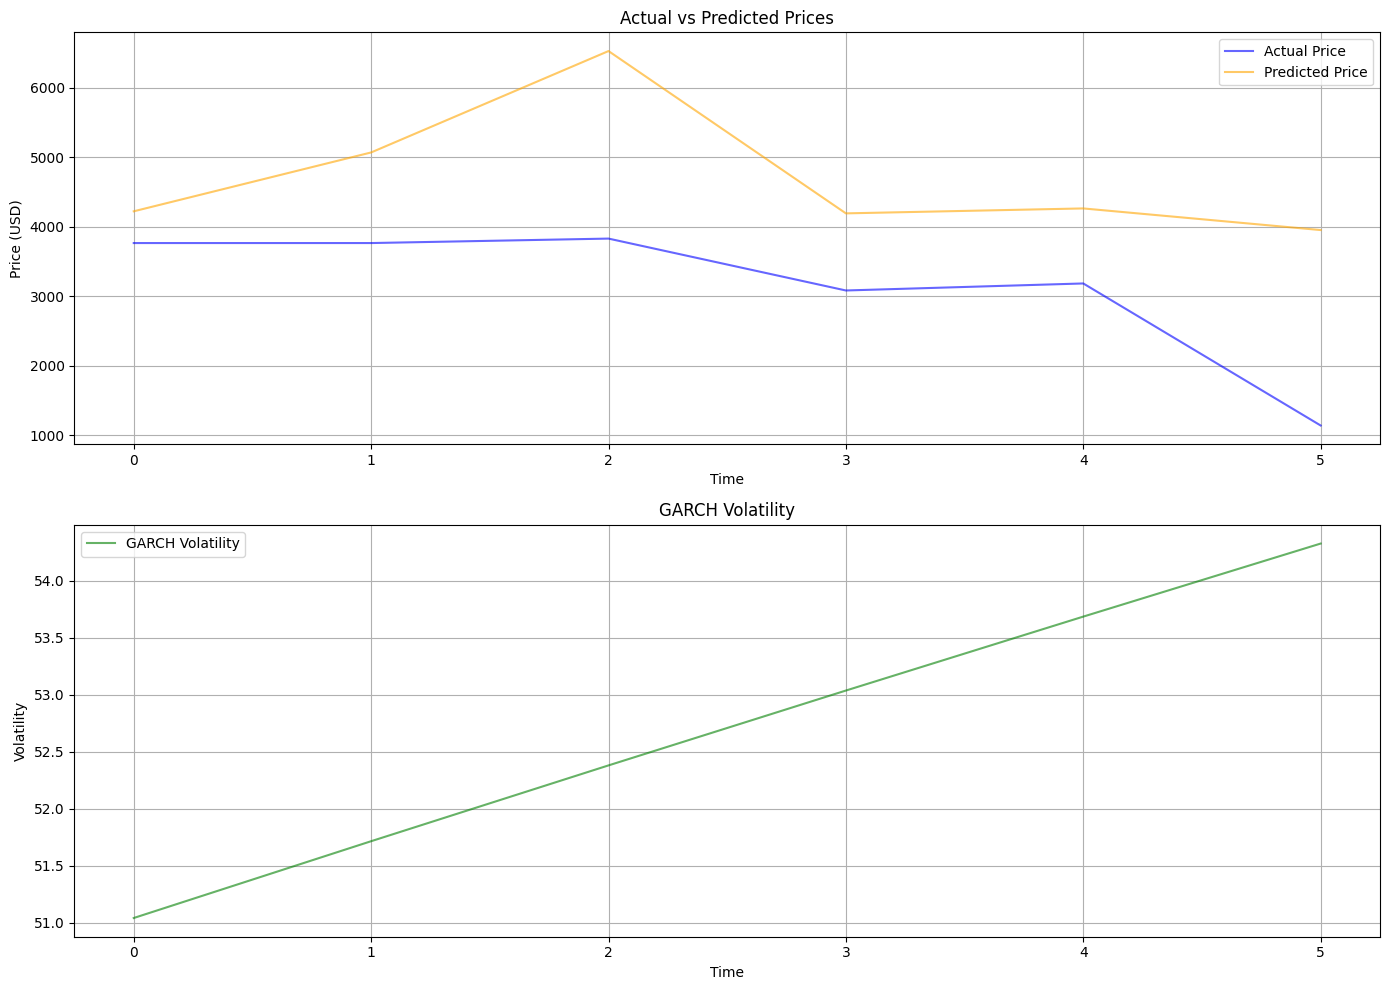

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from arch import arch_model

# Assuming you have already fitted your GARCH model and MLP model
# Here's how to visualize the results.

# 1. Prepare the DataFrame for plotting
# Ensure your DataFrame df has the necessary columns
# df['PriceUSD'] = ...  # Actual prices
# df['Predicted Price'] = test_predictions  # MLP predictions
# df['GARCH Volatility'] = garch_fitted.conditional_volatility

# Create a DataFrame for actual vs predicted
results_df = pd.DataFrame({
    'Actual Price': df['PriceUSD'].iloc[train_size+val_size:].values,
    'Predicted Price': test_predictions,
    'GARCH Volatility': df['GARCH Volatility'].iloc[train_size+val_size:].values
})

# 2. Plotting Actual vs Predicted Prices and GARCH Volatility
plt.figure(figsize=(14, 10))

# Plot Actual vs Predicted Prices
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(results_df['Actual Price'], label='Actual Price', color='blue', alpha=0.6)
plt.plot(results_df['Predicted Price'], label='Predicted Price', color='orange', alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Plot GARCH Volatility
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(results_df['GARCH Volatility'], label='GARCH Volatility', color='green', alpha=0.6)
plt.title('GARCH Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid()

plt.tight_layout()  # Adjusts the subplot parameters to give specified padding
plt.show()


In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Assuming you have already fitted your GARCH model and MLP model
# Prepare your DataFrame for plotting

# 1. Prepare the DataFrame for plotting
#results_df = pd.DataFrame({
   # 'Actual Price': df['PriceUSD'].iloc[train_size + val_size:].values,
   # 'Predicted Price': test_predictions,
  #  'GARCH Volatility': df['GARCH Volatility'].iloc[train_size + val_size:].values
#})

# 2. Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Actual Price trace
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['Actual Price'],
    mode='lines',
    name='Actual Price',
    line=dict(color='blue', width=2),
    hoverinfo='text',
    hovertext='<b>Actual Price</b>: ' + results_df['Actual Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add Predicted Price trace
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['Predicted Price'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='orange', width=2),
    hoverinfo='text',
    hovertext='<b>Predicted Price</b>: ' + results_df['Predicted Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add GARCH Volatility trace
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['GARCH Volatility'],
    mode='lines',
    name='GARCH Volatility',
    line=dict(color='green', width=2, dash='dash'),
    hoverinfo='text',
    hovertext='<b>GARCH Volatility</b>: ' + results_df['GARCH Volatility'].astype(str)
), secondary_y=True)  # Second y-axis

# Update layout
fig.update_layout(
    title='Actual vs Predicted Prices with GARCH Volatility',
    xaxis_title='Time',
    yaxis_title='Price (USD)',  # Label for the first y-axis
    yaxis2_title='GARCH Volatility',  # Label for the second y-axis
    template='plotly_white',
    hovermode='x unified',
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Assuming you have already fitted your GARCH model and MLP model
# Prepare your DataFrame for plotting



# 2. Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Actual Price trace
fig.add_trace(go.Scatter(
    #x=results_df['Date'],  # Use the Date column for x-axis
    x=df['Date'],
    y=results_df['Actual Price'],
    mode='lines',
    name='Actual Price',
    line=dict(color='blue', width=2),
    hoverinfo='text',
    hovertext='<b>Actual Price</b>: ' + results_df['Actual Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add Predicted Price trace
fig.add_trace(go.Scatter(
    #x=results_df['Date'],  # Use the Date column for x-axis
    x=df['Date'],
    y=results_df['Predicted Price'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='orange', width=2),
    hoverinfo='text',
    hovertext='<b>Predicted Price</b>: ' + results_df['Predicted Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add GARCH Volatility trace
fig.add_trace(go.Scatter(
    #x=results_df['Date'],  # Use the Date column for x-axis
    x=df['Date'],
    y=results_df['GARCH Volatility'],
    mode='lines',
    name='GARCH Volatility',
    line=dict(color='green', width=2, dash='dash'),
    hoverinfo='text',
    hovertext='<b>GARCH Volatility</b>: ' + results_df['GARCH Volatility'].astype(str)
), secondary_y=True)  # Second y-axis

# Update layout
fig.update_layout(
    title='Actual vs Predicted Prices with GARCH Volatility',
    xaxis_title='Date',  # Update x-axis title
    yaxis_title='Price (USD)',  # Label for the first y-axis
    yaxis2_title='GARCH Volatility',  # Label for the second y-axis
    template='plotly_white',
    hovermode='x unified',
    showlegend=True
)

# Show the figure
fig.show()
